## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, on = "Mouse ID", how = "inner")
# Display the data table for preview
merged_df = merged_df.set_index(["Mouse ID", "Timepoint"])
merged_df

Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1893 rows x 6 columns]

In [2]:
# Checking the number of mice.
n_mouse = len(merged_df.groupby(["Mouse ID"]))
n_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = merged_df.groupby(["Mouse ID", "Timepoint"]).count()
duplicate_mouse = duplicate_mouse["Drug Regimen"][duplicate_mouse["Drug Regimen"] > 1]
duplicate_mouse = duplicate_mouse.reset_index()
duplicate_mouse = duplicate_mouse["Mouse ID"][0]
print(duplicate_mouse)

g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = merged_df.loc[duplicate_mouse]
duplicate_mouse_info


,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,
0,Propriva,Female,21,26,45.000000,0
0,Propriva,Female,21,26,45.000000,0
5,Propriva,Female,21,26,48.786801,0
5,Propriva,Female,21,26,47.570392,0
10,Propriva,Female,21,26,51.745156,0
10,Propriva,Female,21,26,49.880528,0
15,Propriva,Female,21,26,51.325852,1
15,Propriva,Female,21,26,53.442020,0
20,Propriva,Female,21,26,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.reset_index()
merged_df = merged_df.set_index("Mouse ID")
cleaned_df = merged_df.drop(index = duplicate_mouse)

cleaned_df = cleaned_df.reset_index()
cleaned_df = cleaned_df.set_index(["Mouse ID", "Timepoint"])

cleaned_df

Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1880 rows x 6 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_n_mouse = len(cleaned_df.groupby("Mouse ID").count())
cleaned_n_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_df = cleaned_df.reset_index()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics1 = pd.DataFrame({
    "Mean": mean_DR,
    "Median": median_DR,
    "Variance": var_DR,
    "Standard Deviation": std_DR,
    "Standard Error of the Mean": sem_DR
})
summary_statistics1

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics2 = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = ("mean"),
    Median = ("median"),
    Variance = ("var"),
    Standard_Deviation = ("std"),
    Standard_Error_of_the_Mean = ("sem")
)

summary_statistics2

,Mean,Median,Variance,Standard_Deviation,Standard_Error_of_the_Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

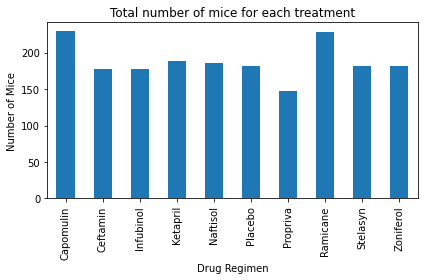

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_vs_treatment = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count()
mice_vs_treatment.plot(kind = "bar", title = "Total number of mice for each treatment", ylabel = "Number of Mice")
# mice_vs_treatment
plt.tight_layout()
plt.show()

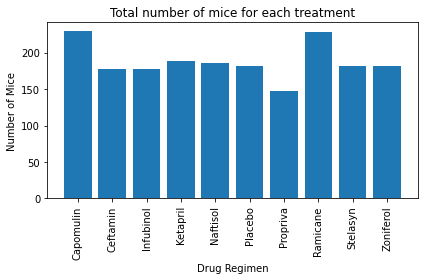

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_mice = mice_vs_treatment.to_numpy()
x_drugs = mice_vs_treatment.index
plt.bar(x_drugs, y_mice)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total number of mice for each treatment")
plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
